# Исследование рынка заведений общественного питания Москвы

Мы хотим открыть небольшое кафе в Москве. Оно будет оригинальным — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнерами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Исследуем рынок. У нас есть открытые данные о заведениях общественного питания в Москве.

## Содержание<a name="Содержание"></a>

1. [Знакомство с данными и предподготовка](#1.-Знакомство-с-данными-и-предподготовка)
	1. [Изучение общей информации](#Изучение-общей-информации)
	2. [Предподготовка](#Предподготовка)
2. [Анализ данных](#2.-Анализ-данных)
	1. [Соотношение видов объектов общественного питания по количеству](#Соотношение-видов-объектов-общественного-питания-по-количеству)
	2. [Соотношение сетевых и несетевых заведений по количеству](#Соотношение-сетевых-и-несетевых-заведений-по-количеству)
	3. [Виды заведений, для которых характерно сетевое распространение](#Виды-заведений,-для-которых-характерно-сетевое-распространение)
	4. [Распределение числа сетевых заведений по количеству посадочных мест](#Распределение-числа-сетевых-заведений-по-количеству-посадочных-мест)
	5. [Среднее количество посадочных мест для разных видов заведений](#Среднее-количество-посадочных-мест-для-разных-видов-заведений)
	6. [Топ-10 улиц по количеству объектов общественного питания](#Топ-10-улиц-по-количеству-объектов-общественного-питания)
	7. [Улицы с одним заведением общественного питания](#Улицы-с-одним-заведением-общественного-питания)
	8. [Распределение количества посадочных мест для топ-10 улиц по числу заведений](#Распределение-количества-посадочных-мест-для-топ-10-улиц--по-числу-заведений)
3. [Общий вывод и презентация](#3.-Общий-вывод-и-презентация)

## 0. Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_palette('pastel')
sns.set_style('darkgrid')

## 1. Знакомство с данными и предподготовка<a name="1.-Знакомство-с-данными-и-предподготовка"></a>

### Изучение общей информации<a name="Изучение-общей-информации"></a>

Изучим данные. Сохраним их в переменную `rest_data` и выведем на экран первые строки и общую информацию.

In [3]:
rest_data = pd.read_csv('rest_data.csv')
display(rest_data.head(5))
print()
rest_data.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Каждая строка в `rest_data` содержит информацию об одном заведении общественного питания. А именно:

- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

Нам повезло: в данных нет пропусков. Но кое-какие проблемы все же есть:

1. Можно понизить размерности численных признаков, чтобы датафрейм занимал меньше места.
2. Признака `chain` булев, но его значения записаны как строки. Заменим `да` и `нет` на `True` и `False`.
2. Данные некачественные: некоторые сетевые и несетевые заведения перепутаны, а сети имеют несколько типов. Например, «Шоколадница» указана и как сетевое, и как несетевое заведение, и ее заведениям присвоены четыре типа: кафе, ресторан, бар и предприятие быстрого обслуживания.  
Так как это учебный проект, мы не будем исправлять эти неточности, но будем иметь их в виду. Если бы исследование было боевым, стоило бы обсудить эти проблемы с тем, кто предоставил нам данные.

### Предподготовка<a name="Предподготовка"></a>

Понизим размерности численных столбцов и посмотрим на результат.

In [4]:
numeric_type_dict = {
    'id': 'uint32',
    'number': 'uint16'
}

rest_data = rest_data.astype(numeric_type_dict)

Заменим `да` и `нет` на `True` и `False` в столбце `chain`. Посмотрим на результат работы с типами.

In [5]:
rest_data['chain'] = rest_data['chain'] == 'да'
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  uint32
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  bool  
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  uint16
dtypes: bool(1), object(3), uint16(1), uint32(1)
memory usage: 465.3+ KB


Проверим, есть ли в данных дубликаты. Будем считать, что в названиях заведений нет ошибок, адреса записаны в одном формате, везде совпадают регистры.

In [6]:
print('Число дубликатов:', rest_data.duplicated().sum())

Число дубликатов: 0


### Вывод

Мы познакомились с данными и обнаружили, что:

- в таблице нет пропусков и дубликатов,
- у численных признаков не оптимальные типы, исправили это.

Можно переходить к анализу.

[К содержанию](#Содержание)

## 2. Анализ данных<a name="2.-Анализ-данных"></a>

### Соотношение видов объектов общественного питания по количеству<a name="Соотношение-видов-объектов-общественного-питания-по-количеству"></a>

Построим столбчатую диаграмму количества видов заведений общественного питания, чтобы исследовать их соотношение. Добавим в столбцы, соответсвующие абсолютным значениям, доли относительно общего числа заведений.

Подготовим данные: сгруппируем их по типу и посчитаем, сколько заведений в каждой группе. После этого добавим столбец с процентами и посмотрим на результат.

In [7]:
grouped_by_type = (rest_data
    .groupby('object_type', as_index=False)
    .agg({'id': 'count'})
)

grouped_by_type.head(3)

,object_type,id
0,бар,856
1,буфет,585
2,закусочная,360


In [8]:
grouped_by_type.rename(columns={'id': 'count'}, inplace=True)
grouped_by_type.sort_values(by='count', ascending=False, inplace=True)

grouped_by_type['percentage'] = \
            (round(grouped_by_type['count'] / grouped_by_type['count'].sum() * 100, 2)).astype(str) + '%'

grouped_by_type.head(3)

,object_type,count,percentage
3,кафе,6099,39.69%
8,столовая,2587,16.84%
7,ресторан,2285,14.87%


Теперь построим график. Чтобы добавить проценты в столбцы, напишем функцию. Она будет принимать столбцы графиков, лейблы, которые надо нанести, и относительную высоту, то есть координату подписи.

In [9]:
def add_labels(rects, labels, height_factor=1.02):
    """Функция для добавления лейблов на столбчатые диаграммы"""
    for i, rect in enumerate(rects):
        height = rect.get_height()
        label = labels[i]
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')  

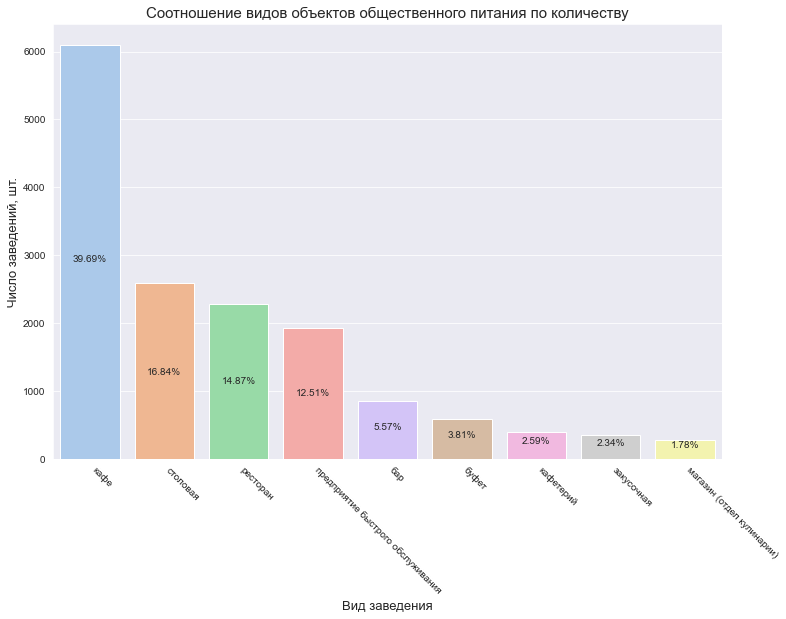

In [10]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='object_type', y='count', data=grouped_by_type)
plt.title('Соотношение видов объектов общественного питания по количеству', fontsize=15)
plt.xlabel('Вид заведения', fontsize=13)
plt.ylabel('Число заведений, шт.', fontsize=13)
plt.xticks(rotation=-45, ha="left")
        
add_labels(ax.patches,
               labels=grouped_by_type['percentage'].reset_index(drop=True),
               height_factor=0.47)

n_objects_by_type_graph = plt.gcf()

Почти 40% рынка занимают кафе. Еще 30% примерно поровну делят столовые и рестораны. От них немного отстают предприятия быстрого обслуживания, которых 12,5%. Остальных заведений гораздо меньше.

### Соотношение сетевых и несетевых заведений по количеству<a name="Соотношение-сетевых-и-несетевых-заведений-по-количеству"></a>

По аналогии с прошлым пунктов построим график соотношение сетевых и несетевых заведений по количеству.

Подготовим данные: сгруппируем их по параметру `chain` и посчитаем, сколько заведений в каждой группе. После этого добавим столбец с процентами и посмотрим на результат.

In [11]:
grouped_by_chain = (rest_data
    .groupby('chain', as_index=False)
    .agg({'id': 'count'})
)

grouped_by_chain

,chain,id
0,False,12398
1,True,2968


In [12]:
grouped_by_chain.rename(columns={'id': 'count'}, inplace=True)
grouped_by_chain.sort_values(by='count', ascending=False, inplace=True)

grouped_by_chain['percentage'] = \
            (round(grouped_by_chain['count'] / grouped_by_chain['count'].sum() * 100, 2)).astype(str) + '%'

grouped_by_chain

,chain,count,percentage
0,False,12398,80.68%
1,True,2968,19.32%


Построим график. Для нанесения процентов на столбцы воспользуемся написанной нами функций `add_labels()`.

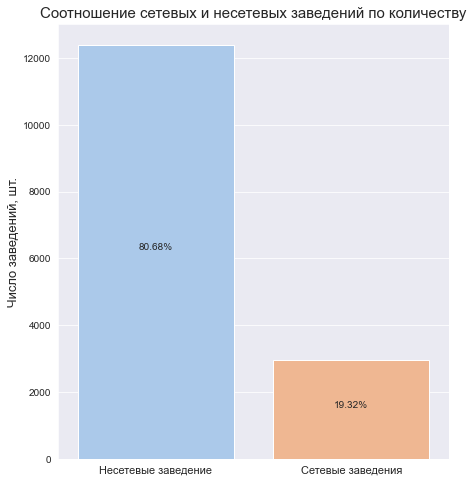

In [13]:
plt.figure(figsize=(7, 8))
ax = sns.barplot(x='chain', y='count', data=grouped_by_chain)
plt.title('Соотношение сетевых и несетевых заведений по количеству', fontsize=15)
plt.xlabel('')
plt.xticks([0, 1], ('Несетевые заведение', 'Сетевые заведения'), fontsize=11)
plt.ylabel('Число заведений, шт.', fontsize=13)

add_labels(ax.patches,
               labels=grouped_by_chain['percentage'].reset_index(drop=True),
               height_factor=0.5)

chain_type_graph = plt.gcf()

В Москве несетевых заведений в четыре раза больше, чем сетевых. Они составляют больше 80% рынка. На сети приходится чуть меньше 20%.

### Виды заведений, для которых характерно сетевое распространение<a name="Виды-заведений,-для-которых-характерно-сетевое-распространение"></a>

В качестве метрики характерности сетевого распространения возьмем долю сетевых заведений от всех заведений определенного типа.

Подготовим данные: оставим только сетевые заведения, сгруппируем их по типу и посчитаем количество точек в каждой группе. Затем добавим в таблицу количество всех заведений каждого типа и рассчитаем долю сетевых заведений от общего количества. Посмотрим на результат.

In [14]:
chain_grouped_by_type = (rest_data[rest_data['chain']==True]
    .groupby('object_type', as_index=False)
    .agg({'id': 'count'})
)

chain_grouped_by_type

,object_type,id
0,бар,37
1,буфет,11
2,закусочная,56
3,кафе,1396
4,кафетерий,52
5,магазин (отдел кулинарии),78
6,предприятие быстрого обслуживания,791
7,ресторан,544
8,столовая,3


In [15]:
chain_grouped_by_type.rename(columns={'id': 'count'}, inplace=True)
chain_grouped_by_type.sort_values(by='count', ascending=False, inplace=True)

chain_grouped_by_type = chain_grouped_by_type.merge(grouped_by_type,
                                                    how='left',
                                                    left_on='object_type', right_on='object_type',
                                                    suffixes=('','_total'))

chain_grouped_by_type

,object_type,count,count_total,percentage
0,кафе,1396,6099,39.69%
1,предприятие быстрого обслуживания,791,1923,12.51%
2,ресторан,544,2285,14.87%
3,магазин (отдел кулинарии),78,273,1.78%
4,закусочная,56,360,2.34%
5,кафетерий,52,398,2.59%
6,бар,37,856,5.57%
7,буфет,11,585,3.81%
8,столовая,3,2587,16.84%


In [16]:
chain_grouped_by_type['percentage'] = (
    round(chain_grouped_by_type['count'] / chain_grouped_by_type['count_total'] * 100, 2))

chain_grouped_by_type.sort_values(by='percentage', ascending=False, inplace=True)

chain_grouped_by_type.head()

,object_type,count,count_total,percentage
1,предприятие быстрого обслуживания,791,1923,41.13
3,магазин (отдел кулинарии),78,273,28.57
2,ресторан,544,2285,23.81
0,кафе,1396,6099,22.89
4,закусочная,56,360,15.56


Построим график.

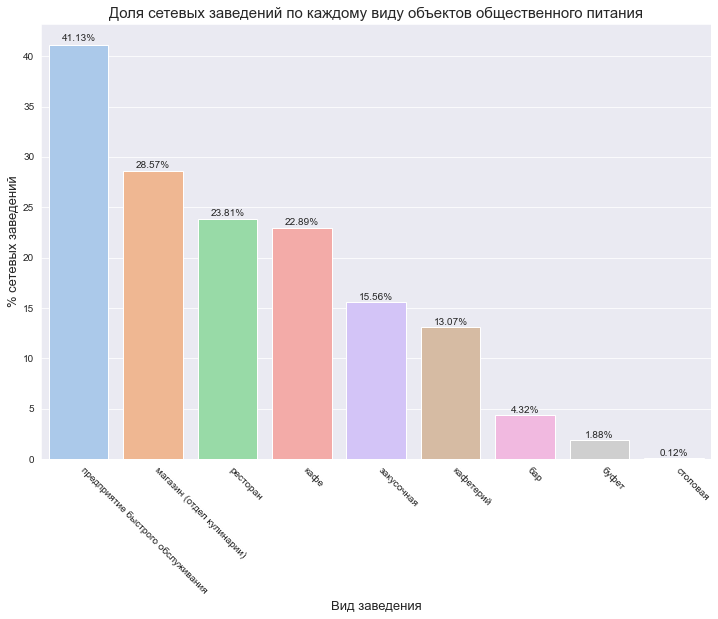

In [17]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='object_type', y='percentage', data=chain_grouped_by_type)
plt.title('Доля сетевых заведений по каждому виду объектов общественного питания', fontsize=15)
plt.xlabel('Вид заведения', fontsize=13)
plt.ylabel('% сетевых заведений', fontsize=13)
plt.xticks(rotation=-45, ha="left")

chain_labels = chain_grouped_by_type['percentage'].astype(str).reset_index(drop=True) + '%'

add_labels(ax.patches,
               labels=chain_labels,
               height_factor=1.005)

chain_share_by_type_graph = plt.gcf()

Сетевое распространение наиболее характерно для предприятий быстрого обслуживания. Из них 41,1% заведений относятся к сетевым. На втором месте отделы кулинарий в магазинах, 28,6% из которых сетевые. Почти одинаковые доли сетевых заведений у ресторанов и кафе — около 23% процентов.

### Распределение числа сетевых заведений по количеству посадочных мест<a name="Распределение-числа-сетевых-заведений-по-количеству-посадочных-мест"></a>

Построим распределение числа сетевых заведений по количеству посадочных мест. Оно поможет на ответить на вопрос о том, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

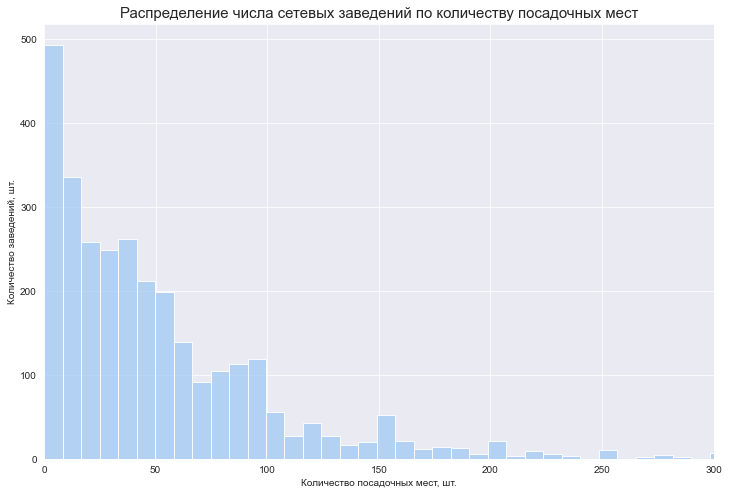

In [18]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(rest_data[rest_data['chain']==True]['number'], bins=70, kde=False)
ax.set_xlim(0, 300)
plt.title('Распределение числа сетевых заведений по количеству посадочных мест', fontsize=15)
plt.xlabel('Количество посадочных мест, шт.')
plt.ylabel('Количество заведений, шт.')

chain_by_n_seats_graph = plt.gcf()

Чем больше посадочных мест, тем меньше заведений с ними. Поэтому для сетей характерно много заведений с небольшим числом посадочных мест.

### Среднее количество посадочных мест для разных видов заведений<a name="Среднее-количество-посадочных-мест-для-разных-видов-заведений"></a>

Построим график количества средних мест по типам заведений и узнаем, какой вид предоставляет в среднем самое большое количество посадочных мест.

Чтобы определить меру среднего, сначала посмотрим на диаграммы размаха для каждого типа заведений.

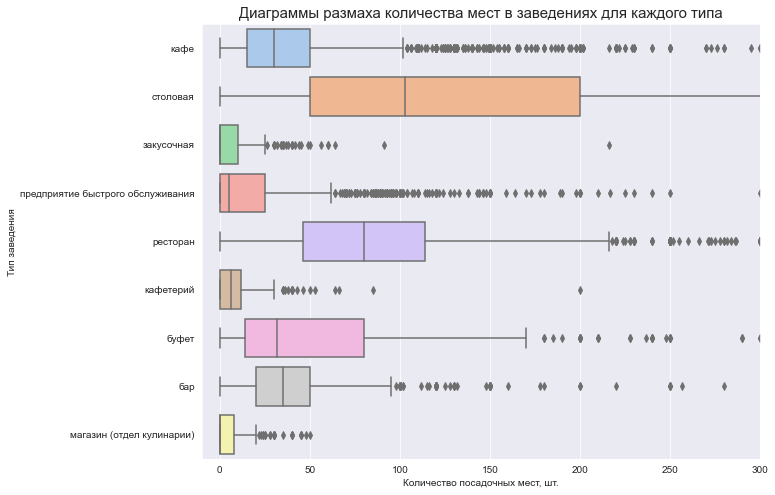

In [19]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='number', y='object_type', data=rest_data)
ax.set_xlim(-10,300)
plt.title('Диаграммы размаха количества мест в заведениях для каждого типа', fontsize=15)
plt.xlabel('Количество посадочных мест, шт.')
plt.ylabel('Тип заведения')

n_seats_by_type_graph = plt.gcf()

Видно довольно много выбросов, особенно у кафе и предприятий быстрого обслуживания. Поэтому назначим мерой среднего медиану — она более устойчива к таким аномалиям.

In [20]:
mean_seats_by_type = (rest_data
    .groupby('object_type', as_index=False)
    .agg({'number': 'median'})
)

mean_seats_by_type.sort_values(by='number', ascending=False, inplace=True)
mean_seats_by_type

,object_type,number
8,столовая,103.0
7,ресторан,80.0
0,бар,35.0
1,буфет,32.0
3,кафе,30.0
4,кафетерий,6.0
6,предприятие быстрого обслуживания,5.0
2,закусочная,0.0
5,магазин (отдел кулинарии),0.0


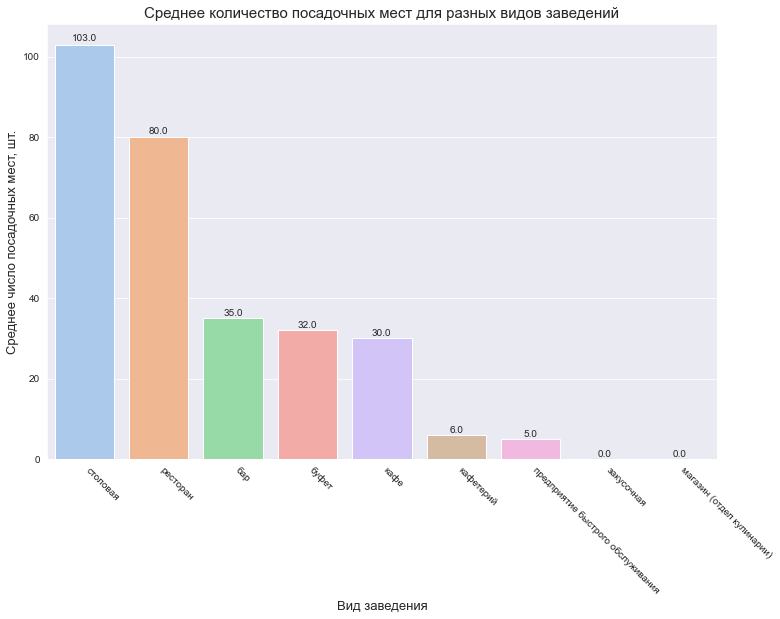

In [21]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='object_type', y='number', data=mean_seats_by_type)
plt.title('Среднее количество посадочных мест для разных видов заведений', fontsize=15)
plt.xlabel('Вид заведения', fontsize=13)
plt.ylabel('Среднее число посадочных мест, шт.', fontsize=13)
plt.xticks(rotation=-45, ha="left")

add_labels(ax.patches,
               labels=mean_seats_by_type['number'].reset_index(drop=True),
               height_factor=1.005)

mean_seats_by_type_graph = plt.gcf()

Больше всего мест в столовых: медианное количество — 103 места. На 20% меньше мест в ресторанах: у них медиана равна 80 местам. Дальше идет резкое падение до 35-30 мест в барах, буфетах и кафе.

### Топ-10 улиц по количеству объектов общественного питания<a name="Топ-10-улиц-по-количеству-объектов-общественного-питания"></a>

Выделим в отдельный столбец `street` информацию об улице из столбца `address`.

In [22]:
rest_data['street'] = rest_data['address'].str.split(pat=',', n=- 1, expand=True)[1]
rest_data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


Сгруппируем данные по улицам и посчитаем количество заведений в группах.

In [23]:
grouped_by_street = (rest_data
    .groupby('street', as_index=False)
    .agg({'id': 'count'})
)

grouped_by_street.head()

,street,id
0,1-й Автозаводский проезд,3
1,1-й Амбулаторный проезд,2
2,1-й Балтийский переулок,1
3,1-й Басманный переулок,1
4,1-й Ботанический проезд,1


In [24]:
grouped_by_street.sort_values(by='id', ascending=False, inplace=True)
grouped_by_street.reset_index(drop=True, inplace=True)
grouped_by_street.rename(columns={'id': 'count'}, inplace=True)
grouped_by_street.head()

,street,count
0,город Зеленоград,232
1,проспект Мира,204
2,Профсоюзная улица,182
3,Ленинградский проспект,171
4,Пресненская набережная,167


В таблицу с улицам попал Зеленоград 🙁 Значит, улицы все-таки не одинаково записаны, как мы предполагали в начале. Посмотрим на первые 15 строк, чтобы понять, есть ли еще такие ошибки.

In [25]:
grouped_by_street.head(15)

,street,count
0,город Зеленоград,232
1,проспект Мира,204
2,Профсоюзная улица,182
3,Ленинградский проспект,171
4,Пресненская набережная,167
5,Варшавское шоссе,161
6,Ленинский проспект,147
7,поселение Сосенское,138
8,проспект Вернадского,132
9,Кутузовский проспект,114


К Зеленограду добавилось поселение Сосенское, зато остальные значения в топ-15 подходят. Сохраним в датафрейм `top_10_streets` первые десять подходящих строк.

In [26]:
top_10_streets = grouped_by_street[1:12]
top_10_streets = top_10_streets[~top_10_streets.index.isin([0, 7])]
top_10_streets

,street,count
1,проспект Мира,204
2,Профсоюзная улица,182
3,Ленинградский проспект,171
4,Пресненская набережная,167
5,Варшавское шоссе,161
6,Ленинский проспект,147
8,проспект Вернадского,132
9,Кутузовский проспект,114
10,Каширское шоссе,112
11,Кировоградская улица,110


Для наглядности построим график.

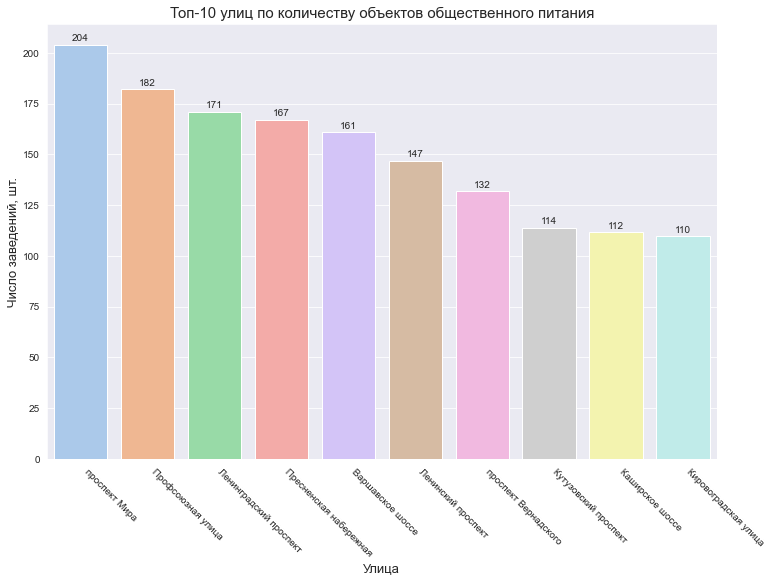

In [27]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='street', y='count', data=top_10_streets)
plt.title('Топ-10 улиц по количеству объектов общественного питания', fontsize=15)
plt.xlabel('Улица', fontsize=13)
plt.ylabel('Число заведений, шт.', fontsize=13)
plt.xticks(rotation=-45, ha="left")

top_10_streets_labels = top_10_streets['count'].reset_index(drop=True)

add_labels(ax.patches,
               labels=top_10_streets_labels,
               height_factor=1.005)

top_10_streets_by_n_rests_graph = plt.gcf()

Узнаем, в каких районах находятся топ-10 улиц по количеству заведений. Для этого загрузим из интернета датафрейм, в котором у улиц указан район. Присоединим его к таблице `top_10_streets`.

In [28]:
mosgaz_streets = pd.read_csv('mosgaz-streets.csv')
mosgaz_streets.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [29]:
mosgaz_streets['streetname'] = ' ' + mosgaz_streets['streetname']

top_10_streets = top_10_streets.merge(mosgaz_streets[['streetname', 'area', 'okrug']],
                                                    how='left',
                                                    left_on='street', right_on='streetname')

top_10_streets = top_10_streets[['street', 'area', 'okrug', 'count']]
top_10_streets.head(10)

,street,area,okrug,count
0,проспект Мира,Алексеевский район,СВАО,204
1,проспект Мира,Ярославский Район,СВАО,204
2,проспект Мира,Район Марьина роща,СВАО,204
3,проспект Мира,Останкинский район,СВАО,204
4,проспект Мира,Район Ростокино,СВАО,204
5,проспект Мира,Район Свиблово,СВАО,204
6,проспект Мира,Мещанский район,ЦАО,204
7,Профсоюзная улица,Академический район,ЮЗАО,182
8,Профсоюзная улица,Район Черемушки,ЮЗАО,182
9,Профсоюзная улица,Район Ясенево,ЮЗАО,182


Одна улица может находиться в нескольких районах, поэтому для наглядности составим сводную таблицу.

In [30]:
pivot_top_10 = top_10_streets.pivot_table(index=('street', 'area', 'okrug'))
pivot_top_10 = pivot_top_10.sort_values(by='count', ascending=False)
del pivot_top_10['count']
pivot_top_10

Empty DataFrame
Columns: []
Index: [( проспект Мира, Ярославский Район, СВАО), ( проспект Мира, Район Свиблово, СВАО), ( проспект Мира, Район Ростокино, СВАО), ( проспект Мира, Район Марьина роща, СВАО), ( проспект Мира, Останкинский район, СВАО), ( проспект Мира, Мещанский район, ЦАО), ( проспект Мира, Алексеевский район, СВАО), ( Профсоюзная улица, Район Коньково, ЮЗАО), ( Профсоюзная улица, Академический район, ЮЗАО), ( Профсоюзная улица, Обручевский район, ЮЗАО), ( Профсоюзная улица, Район Черемушки, ЮЗАО), ( Профсоюзная улица, Район Теплый Стан, ЮЗАО), ( Профсоюзная улица, Район Ясенево, ЮЗАО), ( Ленинградский проспект, Район Сокол, САО), ( Ленинградский проспект, Хорошевский район, САО), ( Ленинградский проспект, Район Аэропорт, САО), ( Ленинградский проспект, Район Беговой, САО), ( Пресненская набережная, Пресненский район, ЦАО), ( Варшавское шоссе, Нагорный район, ЮАО), ( Варшавское шоссе, Донской район, ЮАО), ( Варшавское шоссе, Район Северное Бутово, ЮЗАО), ( Варшавское шоссе, Район Южное Бутово, ЮЗАО), ( Варшавское шоссе, Район Нагатино-Садовники, ЮАО), ( Варшавское шоссе, Район Чертаново Южное, ЮАО), ( Варшавское шоссе, Район Чертаново Центральное, ЮАО), ( Варшавское шоссе, Район Чертаново Северное, ЮАО), ( Ленинский проспект, Район Якиманка, ЦАО), ( Ленинский проспект, Донской район, ЮАО), ( Ленинский проспект, Район Гагаринский, ЮЗАО), ( Ленинский проспект, Район Тропарево-Никулино, ЗАО), ( Ленинский проспект, Район Теплый Стан, ЮЗАО), ( Ленинский проспект, Район Проспект Вернадского, ЗАО), ( Ленинский проспект, Обручевский район, ЮЗАО), ( Ленинский проспект, Ломоносовский район, ЮЗАО), ( проспект Вернадского, Район Раменки, ЗАО), ( проспект Вернадского, Район Тропарево-Никулино, ЗАО), ( проспект Вернадского, Ломоносовский район, ЮЗАО), ( проспект Вернадского, Район Гагаринский, ЮЗАО), ( проспект Вернадского, Район Проспект Вернадского, ЗАО), ( Кутузовский проспект, Район Фили-Давыдково, ЗАО), ( Кутузовский проспект, Район Дорогомилово, ЗАО), ( Каширское шоссе, Район Москворечье-Сабурово, ЮАО), ( Каширское шоссе, Район Орехово-Борисово Северное, ЮАО), ( Каширское шоссе, Район Орехово-Борисово Южное, ЮАО), ( Каширское шоссе, Район Нагатино-Садовники, ЮАО), ( Кировоградская улица, Район Чертаново Северное, ЮАО), ( Кировоградская улица, Район Чертаново Центральное, ЮАО), ( Кировоградская улица, Район Чертаново Южное, ЮАО)]

### Улицы с одним заведением общественного питания<a name="Улицы-с-одним-заведением-общественного-питания"></a>

Посмотрим, как много улиц с одним заведением общественного питания.

In [31]:
one_object_streets = grouped_by_street[grouped_by_street['count']==1]
len(one_object_streets)

579

Таких улиц аж 579. Посмотрим, в каких районах они находятся. Для этого воспользуемся скачанным из интернета датафреймом `mosgaz_streets`.

In [32]:
one_object_streets = one_object_streets.merge(mosgaz_streets[['streetname', 'area', 'okrug']],
                                                    how='left',
                                                    left_on='street', right_on='streetname')

In [33]:
one_object_streets = one_object_streets[['street', 'area', 'okrug']]
one_object_streets = one_object_streets[one_object_streets['area'].notna()]
one_object_streets

,street,area,okrug
0,улица Демьяна Бедного,Район Хорошево-Мневники,СЗАО
1,Андреево-Забелинская улица,Район Богородское,ВАО
2,1-й Саратовский проезд,Район Текстильщики,ЮВАО
3,Андроньевская площадь,Таганский район,ЦАО
4,2-й Стрелецкий проезд,Район Марьина роща,СВАО
...,...,...,...
606,Есенинский бульвар,Район Кузьминки,ЮВАО
607,Елоховский проезд,Басманный район,ЦАО
608,Егорьевский проезд,Район Люблино,ЮВАО
611,Докучаев переулок,Красносельский район,ЦАО


Улиц с одним заведением очень много, поэтому не будем составлять сводную таблицу по районам. Вместо этого посмотрим, в каких округах находятся улицы.

In [34]:
one_object_okrug = list(one_object_streets['okrug'].unique())
one_object_okrug.sort()
one_object_okrug

['ВАО',
 'ЗАО',
 'Зеленоград',
 'САО',
 'СВАО',
 'СЗАО',
 'ЦАО',
 'ЮАО',
 'ЮВАО',
 'ЮЗАО']

### Распределение количества посадочных мест для топ-10 улиц  по числу заведений<a name="Распределение-количества-посадочных-мест-для-топ-10-улиц--по-числу-заведений"></a>

Вместо того чтобы строить 10 гистограммы, построим диаграммы размаха. Гистограммы будут накладываться друг на другу, и смысл графика станет сложно разобрать.

In [35]:
top_10_streets_list = top_10_streets['street'].unique()
top_10_streets_list

array([' проспект Мира', ' Профсоюзная улица', ' Ленинградский проспект',
       ' Пресненская набережная', ' Варшавское шоссе',
       ' Ленинский проспект', ' проспект Вернадского',
       ' Кутузовский проспект', ' Каширское шоссе',
       ' Кировоградская улица'], dtype=object)

In [36]:
top_10_boxplots_data = rest_data[rest_data['street'].isin(top_10_streets_list)]

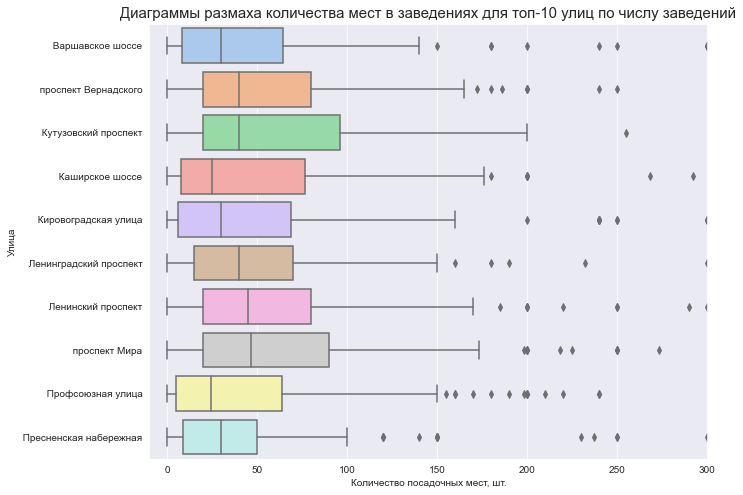

In [37]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='number', y='street', data=top_10_boxplots_data)
ax.set_xlim(-10,300)
plt.title('Диаграммы размаха количества мест в заведениях для топ-10 улиц по числу заведений', fontsize=15)
plt.xlabel('Количество посадочных мест, шт.')
plt.ylabel('Улица')

n_seats_by_top_10_streets_graph = plt.gcf()

По диаграммам видно, что медианные количества посадочных мест в заведениях всех топ-10 улиц находятся в интервале от 25 до 50 мест. То есть заведения на этих улицах небольшие. Возможно, это связано с популярностью улиц и, как следствие, высокой ценой за аренду квадратного метра помещения.

[К содержанию](#Содержание)

## 3. Общий вывод и презентация<a name="3.-Общий-вывод-и-презентация"></a>

Цель нашего исследования — определить перспективность будущего кафе с роботами и дать советы по его созданию. Для этого мы проанализировали московский рынок заведений общественного питания и сделали несколько открытий.

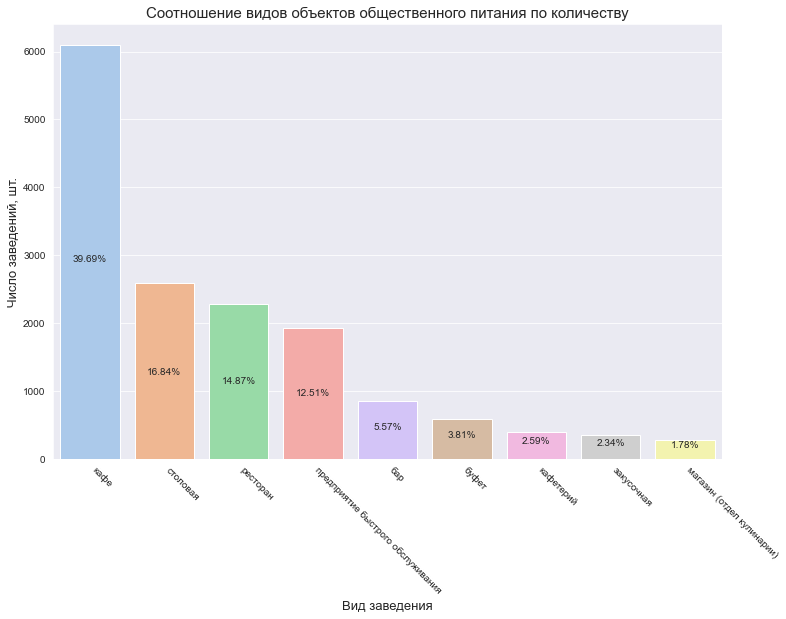

In [38]:
n_objects_by_type_graph

Оказалось, что на кафе приходится 40% заведений общественного питания. Значит, формат пользуется спросом — это плюс для нашего проекта. С другой стороны, кафе — самый конкурентный сегмент рынка и для успешной работы нужно выделяться. Думаю, наши роботы-официанты подходят для этой задачи.

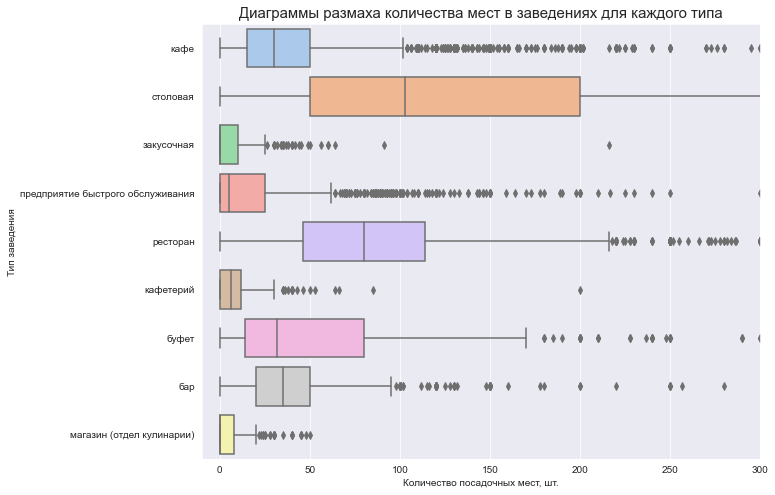

In [39]:
n_seats_by_type_graph

По количеству посадочных мест стоит ориентироваться на интервал от 25 до 50 мест. В этот интервал не попадают столовые и входит мало ресторанов, но это нестрашно, ведь идея нашего заведения сильно отличается от их. Так, столовые не ориентированы на сервис, а рестораны принадлежат к другой ценовой категории.

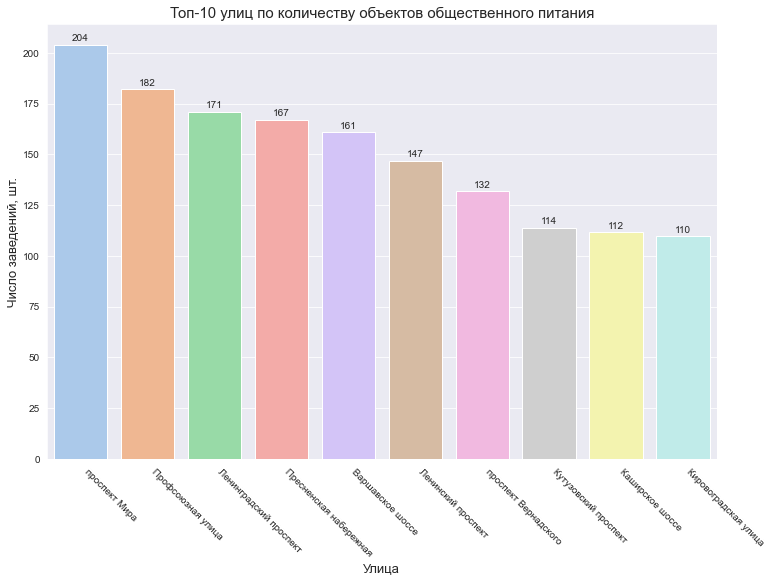

In [40]:
top_10_streets_by_n_rests_graph

На графике выше представлены 10 улиц с наибольшим числом заведений. Но я бы не ориентировался на него при выборе места:

1. Улицы из топа — одни из самых длинных в Москве, и на них много заведений, скорее всего, поэтому, а не из-за популярности.
2. Не все они хотя бы частью находятся в ЦАО. А нам желательно открыться именно в нем, потому что так всем жителям будет удобно добираться до кафе. Также многие ездят в ЦАО каждый день на работу.

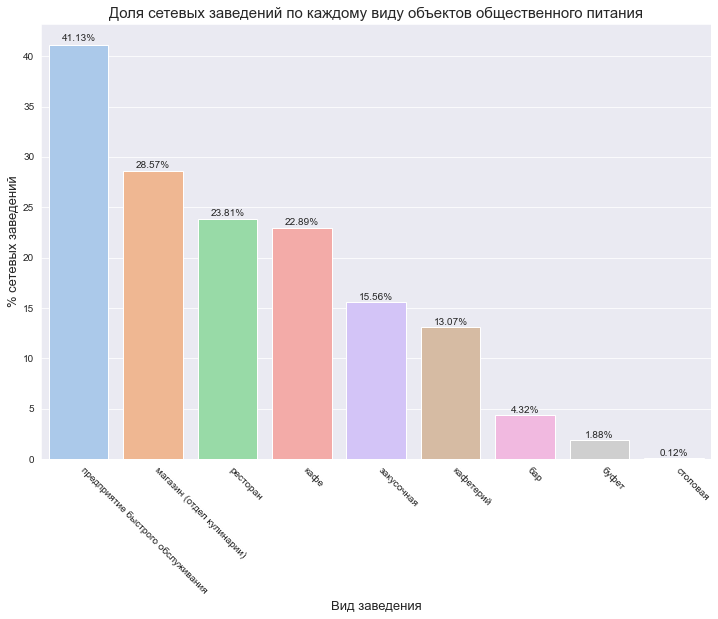

In [41]:
chain_share_by_type_graph

Чтобы оценить перспективность развития сети, мы посмотрели долю сетей по каждому типу заведений. Больше всего сетей у предприятий быстрого обслуживание, на втором месте отделы кулинарии в магазинах. Оба формата нам не подходят, так как не предполагают наличие официантов. 

Из кафе каждое пятое заведение сетевое. Это довольно много, значит, сети экономически выгодно открывать. При этом есть запас роста до лидера в лице фастфуда, то есть рынок не перенасыщен. Эти факторы указывают на то, что от идеи сети отказываться не стоит и надо более детально изучить этот вопрос.

#### Презентация

По итогам исследования мы подготовили презентацию. Ее можно посмотреть вот здесь: [\**клик**](https://drive.google.com/file/d/1tMXW6mI9tvqB9BTQSVKsCslkKNTw7fUz/view?usp=sharing).

[К содержанию](#Содержание)